In [1]:
# オリジナルモジュールのインポート
from introngap import PileUp
from gbkparse import Seq_count

# モジュールのインポート
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# クラスのインスタンス化
gbk = Seq_count()

# gbkファイルの読み込み
gbk.read_gbk('data/gbk/human_ttn.gb')

# トランスクリプトバリアントの設定
gbk.set_mrna_id('NM_001267550.2')

In [9]:
g = Seq_count()
g.read_gbk('data/gbk/human_ttn.gb')
for i in gbk.get_mrna_ids():
    g.set_mrna_id(i)
    print(i,g.intron_num())

NM_003319.4 190
NM_133437.4 191
NM_133432.3 191
NM_133378.4 311
XM_017004821.1 335
NM_001256850.1 312
NM_001267550.2 362
XM_017004820.1 335
XM_024453099.1 190
XM_017004823.1 191
XM_047445668.1 276
XM_024453098.1 271
XM_024453097.1 272
XM_017004822.1 273
XM_047445665.1 281
XM_047445663.1 299
XM_024453095.1 309
XM_047445660.1 316
XM_047445661.1 312
XM_017004819.1 358
NM_133379.5 45
XM_024453100.2 183


In [29]:
n = 4
df = gbk.intron_motif_stats(intron=1, n=n) 

for i in range(gbk.intron_num()-1):
    tmp_df = gbk.intron_motif_stats(intron=i+2, n=n)
    tmp_df.columns = [f'intron_{i+2}']
    df = pd.merge(df, tmp_df, left_index=True, right_index=True)
ndf = df/df.sum(axis=0)
ndf.head()

,Number,intron_2,intron_3,intron_4,intron_5,intron_6,intron_7,intron_8,intron_9,intron_10,...,intron_353,intron_354,intron_355,intron_356,intron_357,intron_358,intron_359,intron_360,intron_361,intron_362
AAAA,0.010967,0.014046,0.022039,0.018711,0.0,0.027653,0.024523,0.005855,0.015794,0.009812,...,0.009709,0.016155,0.094737,0.025070,0.015504,0.057851,0.013569,0.030928,0.001916,0.007407
AAAC,0.003134,0.003625,0.006887,0.008316,0.0,0.008745,0.005450,0.004684,0.007481,0.006541,...,0.000000,0.006462,0.021053,0.002786,0.007752,0.008264,0.004071,0.010309,0.005747,0.000000
AAAT,0.012926,0.015406,0.016529,0.018711,0.0,0.017963,0.013624,0.004684,0.013300,0.010630,...,0.019417,0.011309,0.010526,0.022284,0.038760,0.049587,0.010855,0.010309,0.007663,0.014815
AAAG,0.009401,0.005437,0.008264,0.006237,0.0,0.011108,0.005450,0.007026,0.010806,0.007359,...,0.019417,0.012924,0.010526,0.022284,0.000000,0.008264,0.016282,0.000000,0.005747,0.014815
AACA,0.003917,0.004984,0.008953,0.008316,0.0,0.008745,0.002725,0.004684,0.008313,0.004906,...,0.000000,0.008078,0.021053,0.008357,0.007752,0.008264,0.002714,0.010309,0.003831,0.007407


In [ ]:
fig = px.imshow(ndf.T, text_auto=True)
fig.update_layout(width=800, height=800)
fig.show()

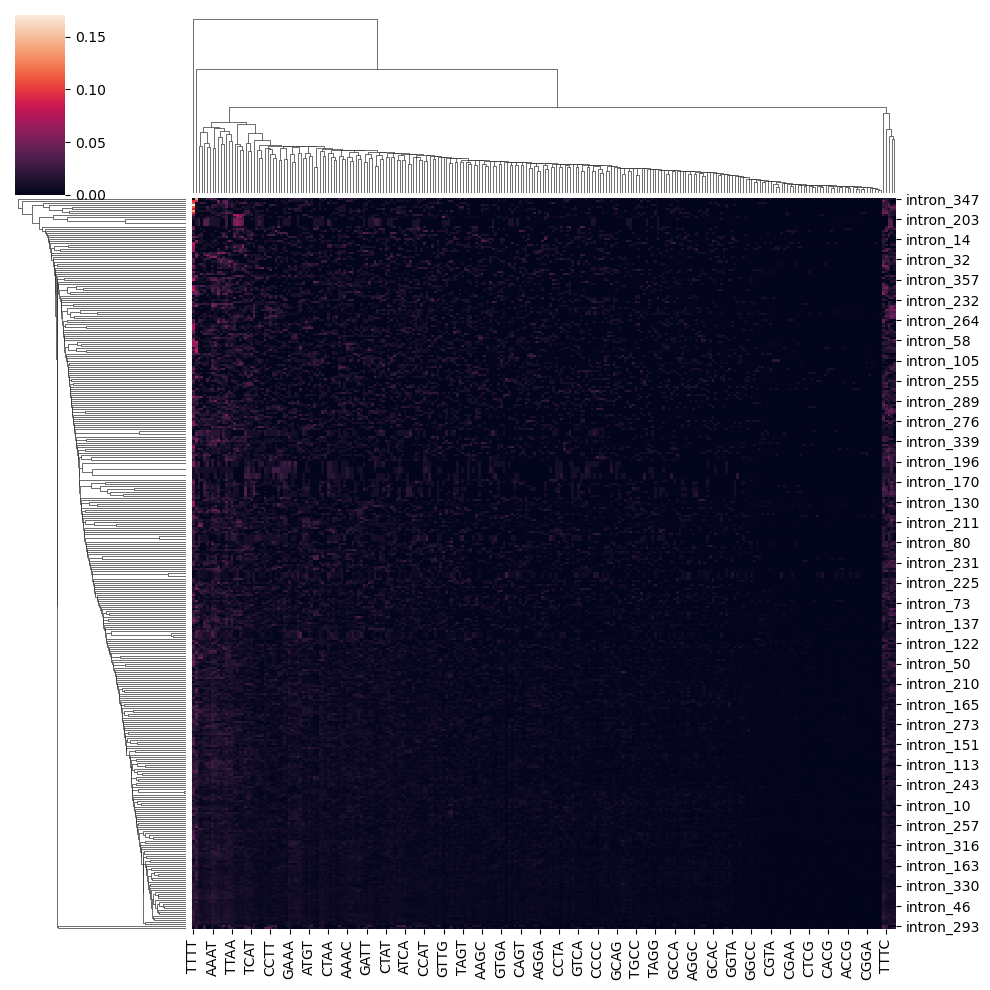

In [21]:
g = sns.clustermap(ndf.T)

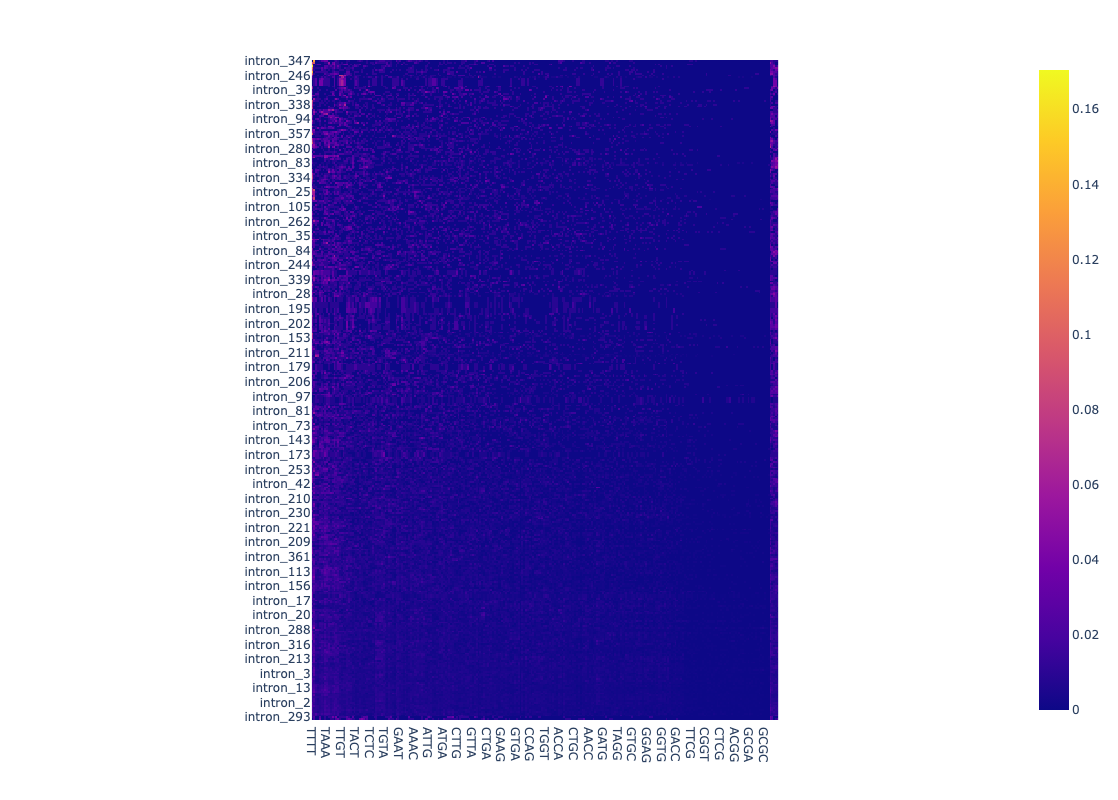

In [15]:
fig = px.imshow(clustered_ndf.T, text_auto=True)
fig.update_layout(width=800, height=800)
fig.show()

In [ ]:
reordered_index = ndf.index[g.dendrogram_row.reordered_ind]
reordered_columns = ndf.columns[g.dendrogram_col.reordered_ind]
clustered_ndf = ndf.loc[reordered_index, reordered_columns]
clustered_ndf

In [26]:
ls = [172, 181, 190, 203]
ls.sort()
for i in ls:
    print("intron_"+str(i), gbk.intron_seq(i))

intron172 GTAGACACCCTCTTGTTGCTGTGTTTGATATTGTTTGTTTGTCTTTACTTTGTCTAATAATGAAAATACTAATATCTTTAAAG
intron181 GTAGACACCCTCTTGTTGCTGTGTTTGATATTGTTTGTTTGTCTTTACTTTGTCTAATAATGAAAATACTAATATCTTTAAAG
intron190 GTAGACACCCTCTTGTTGCTGTGTTTGATATTGTTTGTTTGTCTTTACTTTGTCTAATAATGAAAATACTAATATCTTTAAAG
intron203 GTAGACACCCTCATGGTGCTGTGTTTGATATTGTTTGTTTGTCTTTACTTTGTCTAACAATGAAAATAATAATATCTTTTAAAG


In [24]:
ls = [196, 178, 187, 194, 176, 185]
ls.sort()
for i in ls:
    print("intron_"+str(i), gbk.intron_seq(i))

intron_176 GTACATGTCAGCTCAACCTTATCCTGCAGAAGAAATCTCTCTTCCATTCCTGAAAACAATTTTAGTCCATTCCTCTTCATTAACCTAAGTATAAAACTACTAATATCTTTCAAG
intron_178 GTATTTTTTACCCCTGTCCTTTTTCTGCAGAAGAAATATCTCTTCTGATCTTAGAAATATTTTACTCCATTTGTCTCATTAACCTAAGTGAAAAACTACTAATATCTTTCAAG
intron_185 GTACATGTCAGCTCAACCTTATCCTGCAGAAGAAATCTCTCTTCCATTCCTGAAAACAATTTTAGTCCATTCCTCTTCATTAACCTAAGTATAAAACTACTAATATCTTTCAAG
intron_187 GTATTTTTTACCCCTGTCCTTTTTCTGCAGAAGAAATATCTCTTCTGATCTTAGAAATATTTTACTCCATTTGTCTCATTAACCTAAGTGAAAAACTACTAATATCTTTCAAG
intron_194 GTACATGTCAGCTCAACCTTATCCTGCAGAAGAAATCTCTCTTCCATTCCTGAAAACAATTTTAGTCCATTCCTCTTCATTAACCTAAGTATAAAACTACTAATATCTTTCAAG
intron_196 GTATTTTTTACCCCTGTCCTTTTTCTGCAGAAGAAATATCTCTTCTGATCTTAGAAATATTTTACTCCATTTGTCTCATTAACCTAAGTGAAAAACTACTAATATCTTTCAAG


In [27]:
ls = [170, 198, 201, 202, 169, 199, 200]
ls.sort()
for i in ls:
    print("intron_"+str(i), gbk.intron_seq(i))

intron_169 GTATTTGTCACTGACTTTAGGCTTCAGAAGACCTAATTCTTCTGCTCTTGACAATATTTTTTTCTAGCGGTCTTCATAACACCTAAATGTAATTTCACTAATATCTTTCAAG
intron_170 GTAGTTGCCACTGACCTTAGGCTTCAGATCTCATTCTTTTGCTCTTGAAGATATTTTTTCCAGTGGTCTTCATAACTTCTGAATGTAATTTTGCTAATATCTTTTAAG
intron_198 GTATTTGTCACTGACCTTAGGCTTCAGATGATCTAATTCTTTTGCAGTTGAAGACATTTTGTTCCAGTGGTCTTCATAACCCCTAAATGTAATTTTACCTAATATCTTTTAAG
intron_199 GTATTTGTCACTGGCTTTAGGCTTCAGAAGACTGAACTCTTCATTTCTTGAAAATACTTTTCTAGTGGTCTTCAAACTTCTAAATGTAATTTCACTAATATCTTTTAAG
intron_200 GTATTTGTCACTGGCTTTAGGCTTCAGAAGATCAAACTCCTCTATTCTTGAAAATATTTTTTCTAGTGGTCTTCATAACCCCTAAATGTAATTTCACTAATATCTTTTAAG
intron_201 GTATTTGTCATTGAGTTTAAGCGTCAGAAGATCTATCTCTTCTACTCTTGAAAATATTTTTCCTAATGGTCTTCATAACTTCTAAATGTAATTTCACTAATATCTTTTAAG
intron_202 GTATTTGTCACTGATTTTAGGCTTCAGATGATCAAACTCTTCTGCTCTGGAAAGTATTTTTCTAGTGGTCTTCATAATGCCTAAATGTAATTTCACTATTATCTTTCAAG


In [28]:
ls = [355, 299, 323, 235, 297, 290, 314, 245]
ls.sort()
for i in ls:
    print("intron_"+str(i), gbk.intron_seq(i))

intron_235 GTAAATAGTTTTATCAAATAGTCCACCCCAAAATCATTTTTTTTGCCTTTAGTTTTATATTTCTTCTTTAAAGTGCTTCAATTAATAAGTTCTTTCTTTTTTTTCTTGATAG
intron_245 GTATGAAAACTACAGTGAATAATCTTTTATTTCTAACAATTCACACTTGCTAGATTTAAAGTACAAAGACATATGTTTCTAATATCTTGTAACTTTTTCTTCCCAG
intron_290 GTAAGTAGGAGAACATTTTCACATACAAAGCCATTTTTACTTTTTTTTTAAATTTCTTATAATCAATATGATCTTTTTCACAG
intron_297 GTAAGTCTTATTTAGTGGAAAGAATAGATCTTCTGTTCTTTCAAAAGCAGAAATGGCAATAACATTTTGTGCCATGATTTTTTTTTTCTGCAG
intron_299 GTATAGTATTAATGGATTTATTCAGTTTTCATGTTATCTAACTTTGTTTTCAGCTATATGCTAATTCGTTTTTTACTTTTATTTTTTAG
intron_314 GTAGGAACATTTCCCGGTGGTTTTTCATTTTATTTTTTAAAATTATCTTTTAGCCTGGGAAATTAACTTTTCAATCAATTTCTGCAG
intron_323 GTAGGTCCATTTTACTTTTTATGTACTTTTTTTTTTAAAGCAAATTAAGCCTCCTTCCTTTTCTGATTAAAATGTATTTTTTTCTTTGCAG
intron_355 GTATTTTATTTTTATTTTCAGTGCTTTTTATTTTTAAAGAAAAAAAAATCTCAAAAACACACTATGAAAACCACCACAATTGTATTTTCCCCCAACAG
